<a href="https://colab.research.google.com/github/waleogundeji/personal/blob/main/CNN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib

from google.colab import drive
drive.mount("/content/gdrive")

data_dir = "gdrive/My Drive/vehicle_images"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
batch_size = 32
img_height = 180
img_width = 180
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 4334 files belonging to 4 classes.
Using 3468 files for training.
Found 4334 files belonging to 4 classes.
Using 866 files for validation.
['bus', 'motorcycle', 'plane', 'train']


(32, 180, 180, 3)
(32,)


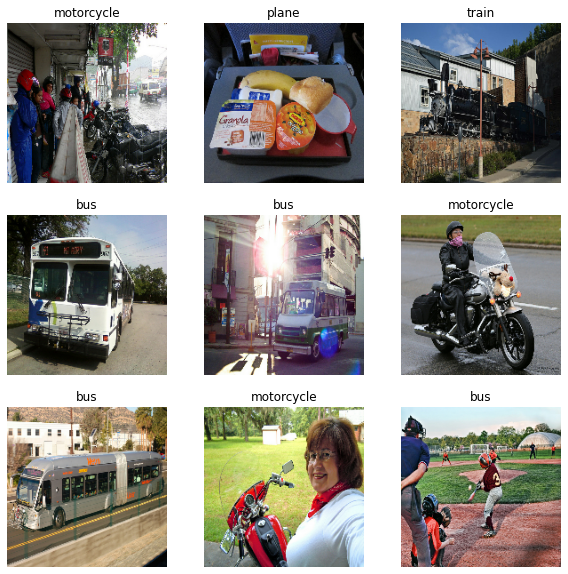

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
  
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
num_classes = 4

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
#tf.keras.layers.Conv2D(filters=20,kernel_size=(3,3),strides=(1, 1),padding="valid",data_format=None,dilation_rate=(1, 1),groups=1,activation=None,use_bias=True,kernel_initializer="glorot_uniform",bias_initializer="zeros")

In [ ]:
epochs=10
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

Epoch 1/10
109/109 [==============================] - 205s 2s/step - loss: 1.2599 - accuracy: 0.4426 - val_loss: 0.9983 - val_accuracy: 0.5935
Epoch 2/10
109/109 [==============================] - 77s 704ms/step - loss: 0.9854 - accuracy: 0.6061 - val_loss: 0.9548 - val_accuracy: 0.6085
Epoch 3/10
109/109 [==============================] - 77s 704ms/step - loss: 0.8563 - accuracy: 0.6502 - val_loss: 0.9409 - val_accuracy: 0.6236
Epoch 4/10
109/109 [==============================] - 79s 721ms/step - loss: 0.6822 - accuracy: 0.7321 - val_loss: 1.0356 - val_accuracy: 0.5982
Epoch 5/10
109/109 [==============================] - 77s 705ms/step - loss: 0.4918 - accuracy: 0.8123 - val_loss: 1.1606 - val_accuracy: 0.5970
Epoch 6/10
109/109 [==============================] - 77s 702ms/step - loss: 0.3377 - accuracy: 0.8844 - val_loss: 1.4505 - val_accuracy: 0.5727
Epoch 7/10
109/109 [==============================] - 77s 707ms/step - loss: 0.2451 - accuracy: 0.9268 - val_loss: 1.4878 - val_accu

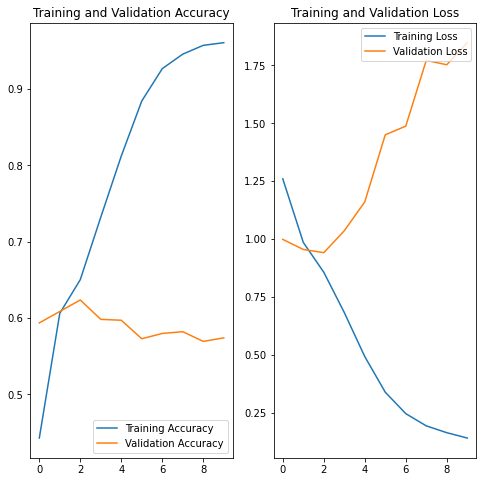

(32, 180, 180, 3)
(32,)


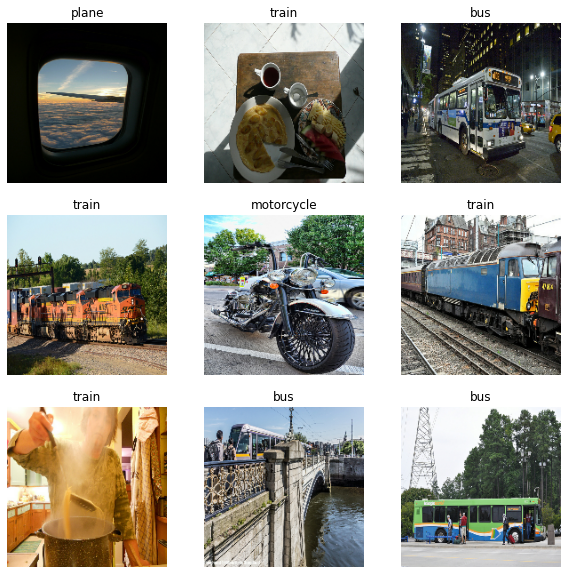

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
for image_batch,labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break
        

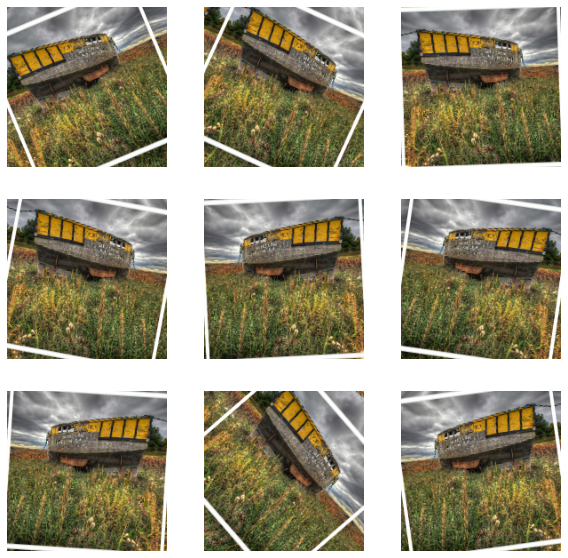

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])
for image, _ in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [ ]:
input_shape = (img_height, img_width, 3))

In [ ]:

IMG_SIZE = (160, 160)
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')
image_batch,label_batch=next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

9420800/9406464 [==============================] - 0s 0us/step


ValueError: ignored

In [ ]:
base_model.trainable = False
base_model.summary()
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

prediction_layer = tf.keras.layers.Dense(3)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

In [ ]:
inputs = tf.keras.Input(shape=(160,160,3))
x=data_augmentation(inputs)
x=preprocess_input(x)
x=base_model(x,training=False)
x=global_average_layer(x)
x=tf.keras.layers.Dropout(0.2)(x)
outputs=prediction_layer(x)
model=tf.keras.Model(inputs,outputs)

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
                        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
              
model.summary()
len(model.trainable_variables)
initial_epochs = 10
loss0, accuracy0 = model.evaluate(val_ds)
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))
              
history = model.fit(train_ds,epochs=initial_epochs,validation_data=val_ds)

In [ ]:
base_model.trainable=True
base_model.summary()
#lets take a look to see how many layers are inthe base model
print('Number of layers in the base model: ', len(base_model.layers))
#Fine-tune from this layer onwards
fine_tune_at = 100
#Freeze all layers before 'fine_tune_at' layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable=False

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

In [ ]:
initial_epochs=10
fine_tune_epochs=10
total_epochs = initial_epochs + fine_tune_epochs
history_fine = model.fit(train_ds,epochs=total_epochs,initial_epoch=history.epoch[-1],validation_data=val_ds)